In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 26.6 MB/s 
     |████████████████████████████████| 9.9 MB 65.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1.데이터 import

In [ ]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pmdarima as pm
from pmdarima.arima import ndiffs
import statsmodels

In [ ]:
stocks = fdr.StockListing('KOSPI')
stocks

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,60400,2,-2200,-3.51,62500,62500,60400,15331184,935960853120,360574866020000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,584000,2,-1000,-0.17,585000,590000,578000,239024,139765656000,136656000000000,234000000,STK
2,207940,KR7207940008,삼성바이오로직스,KOSPI,,870000,2,-14000,-1.58,884000,885000,870000,37710,32966593000,61921380000000,71174000,STK
3,000660,KR7000660001,SK하이닉스,KOSPI,,81900,2,-2800,-3.31,83900,83900,81800,4594058,379357522580,59623393693500,728002365,STK
4,051910,KR7051910008,LG화학,KOSPI,,711000,2,-11000,-1.52,718000,728000,711000,163235,117044014000,50191155873000,70592343,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,002785,KR7002781003,진흥기업우B,KOSPI,,5530,2,-710,-11.38,6240,6240,5500,141094,813146060,4740415540,857218,STK
938,002787,KR7002782001,진흥기업2우B,KOSPI,,14600,2,-2850,-16.33,16550,16550,14600,24780,380858900,4304196800,294808,STK
939,001527,KR7001522002,동양2우B,KOSPI,,13700,2,-250,-1.79,13950,14200,13500,6791,92684350,4227395300,308569,STK
940,001525,KR7001521004,동양우,KOSPI,,6760,2,-30,-0.44,6790,6790,6540,13972,92186540,4175861560,617731,STK


In [ ]:
# df = pd.DataFrame(stocks)
# medi_targets = ['000640','170900','000020','017180','003850','003000','207940','001360','000520','005500','008490','068270','019170','019175','004080','137310','302440','003060','003520','002630','000220','000225','000227','000100','000105','102460','249420','000230','003120','007570','007575','234080','001060','001065','001067','096760','271980','002620','185750','063160','001630','011000','005690','004720','950210','293480','033270','002390','008930','128940','009420','372910','004310','016580']
# df_medi = df.loc[stocks['Code'].isin(medi_targets)]
# df_medi

In [ ]:
#변동률이 가장 큰 4가지만
stocks['AbsChanges']=abs(stocks['ChagesRatio'])
stocks=stocks.sort_values(by='AbsChanges',ascending=False)
stocks.head(4)

stocks_up=stocks.head(4).reset_index()
del stocks_up['index']
stocks_up

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,AbsChanges
0,003075,KR7003071008,코오롱글로벌우,KOSPI,,53200,5,-22700,-29.91,75400,75400,53200,169863,10221439600,16641119600,312803,STK,29.91
1,005965,KR7005961008,동부건설우,KOSPI,,50100,4,11500,29.79,50100,50100,45500,111557,5512205950,11309173200,225732,STK,29.79
2,003560,KR7003560000,IHQ,KOSPI,,520,2,-193,-27.07,646,649,515,39515974,21751264158,96644237040,185854302,STK,27.07
3,033180,KR7033180001,KH 필룩스,KOSPI,,1220,1,180,17.31,1025,1320,1025,26570151,32415174315,191247669700,156760385,STK,17.31


In [ ]:
#변동률이 가장 큰 5가지만
stocks['AbsChanges']=abs(stocks['ChagesRatio'])
stocks=stocks.sort_values(by='AbsChanges',ascending=False)
stocks.head(5)

stocks_up=stocks.head(5).reset_index()
del stocks_up['index']
stocks_up

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,AbsChanges
0,003075,KR7003071008,코오롱글로벌우,KOSPI,,53200,5,-22700,-29.91,75400,75400,53200,169863,10221439600,16641119600,312803,STK,29.91
1,005965,KR7005961008,동부건설우,KOSPI,,50100,4,11500,29.79,50100,50100,45500,111557,5512205950,11309173200,225732,STK,29.79
2,003560,KR7003560000,IHQ,KOSPI,,520,2,-193,-27.07,646,649,515,39515974,21751264158,96644237040,185854302,STK,27.07
3,033180,KR7033180001,KH 필룩스,KOSPI,,1220,1,180,17.31,1025,1320,1025,26570151,32415174315,191247669700,156760385,STK,17.31
4,010820,KR7010820009,퍼스텍,KOSPI,,3410,1,480,16.38,2940,3805,2935,34982692,120962540760,163889578600,48061460,STK,16.38


In [ ]:
#네이버 금융
start_date = '2012-01-01'
end_date = '2022-10-31'

df1 = fdr.DataReader(stocks_up['Code'][0], start=start_date, end=end_date)
df2 = fdr.DataReader(stocks_up['Code'][1], start=start_date, end=end_date)
df3 = fdr.DataReader(stocks_up['Code'][2], start=start_date, end=end_date)
df4 = fdr.DataReader(stocks_up['Code'][3], start=start_date, end=end_date)
df5 = fdr.DataReader(stocks_up['Code'][4], start=start_date, end=end_date)

In [ ]:
# #네이버 금융
# start_date = '2012-01-01'
# end_date = '2022-10-31'

# #액면분할을 반영한 수정주가가 조회되는데 거래량은 보정되지 않은 상태
# df_홀 = fdr.DataReader('000230', start=start_date, end=end_date)
# df_홀['Code']='000230'
# df_홀

## 2.df1(변동률 1위)

### 2-1.시계열 자료 시각화

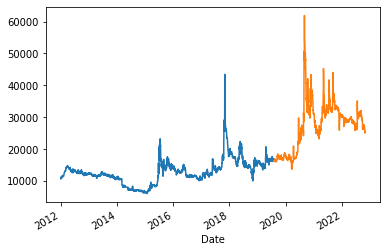

In [ ]:
#df1 종가 시각화 7:3으로 train, test분할
y1_train = df1['Close'][:int(0.7*len(df1))]
y1_test = df1['Close'][int(0.7*len(df1)):]
y1_train.plot()
y1_test.plot()

위의 그래프를 보면,

정상성X -> 차분 필요 = ARIMA의 차수(d)가 1이상일 것

계절성이나 주기성은 보이지 않음

In [ ]:
#몇차 차분이 최선인지 파악하기 위해 ndiffs 함수 사용
kpss_diffs = ndiffs(y1_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y1_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 1


###2-2.ARIMA 모형 적합 (최적모형 탐색)

In [ ]:
# model = pm.auto_arima(y = y_train        # 데이터
#                       , d = 1            # 차분 차수, ndiffs 결과
#                       , start_p = 0
#                       , max_p = 3
#                       , start_q = 0
#                       , max_q = 3
#                       , m = 1
#                       , seasonal = False # 계절성 ARIMA가 아니라면 필수
#                       , stepwise = True
#                       , trace=True
#                       )

* y: array 형태의 시계열 자료

* d (기본값 = none): 차분의 차수, 이를 지정하지 않으면 실행 기간이 매우 길어질 수 있음

* start_p (기본값 = 2), max_p (기본값 = 5): AR(p)를 찾을 범위 (start_p에서 max_p까지 찾는다)

* start_q (기본값 = 2), max_q (기본값 = 5): AR(q)를 찾을 범위 (start_q에서 max_q까지 찾는다)

* m (기본값 = 1): 계절적 차분이 필요할 때 쓸 수 있는 모수로 m=4이면 분기별, m=12면 월별, m=1이면 계절적 특징을 띠지 않는 데이터를 의미한다. m=1이면 자동적으로 seasonal 에 대한 옵션은 False로 지정된다.

* seasonal (기본값 = True): 계절성 ARIMA 모형을 적합할지의 여부

* stepwise (기본값 = True): 최적의 모수를 찾기 위해 쓰는 힌드만 - 칸다카르 알고리즘을 사용할지의 여부, False면 모든 모수 조합으로 모형을 적합한다.

* trace (기본값 = False): stepwise로 모델을 적합할 때마다 결과를 프린트하고 싶을 때 사용한다.

In [ ]:
#필수 옵션만 적용
model = pm.auto_arima (y1_train, d = 1, seasonal = False, trace = True)
model.fit(y1_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=29470.573, Time=1.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=29573.938, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=29574.942, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=29574.077, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=29571.979, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=29469.823, Time=1.54 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=29469.413, Time=0.67 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=29469.539, Time=0.84 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=29544.692, Time=1.46 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=29469.175, Time=4.09 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=29465.296, Time=7.43 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=29464.618, Time=4.55 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=29472.420, Time=1.65 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=29450.246, Time=5.64 sec
 ARIMA(4,1,2)(0,0,0

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

auto_arima를 사용한 결과 최적의 모델은 ARIMA (~) 모형

###2-3.잔차 검정

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1866
Model:               SARIMAX(4, 1, 3)   Log Likelihood              -14716.169
Date:                Sun, 04 Dec 2022   AIC                          29448.338
Time:                        06:57:09   BIC                          29492.586
Sample:                             0   HQIC                         29464.642
                               - 1866                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8702      0.037     23.721      0.000       0.798       0.942
ar.L2         -1.2452      0.034    -36.194      0.000      -1.313      -1.178
ar.L3          0.5005      0.041     12.343      0.000       0.421       0.580
ar.L4         -0.2384      0.010    -23.501      0.000      -0.258      -0.219
ma.L1         -0.8505      0.040    -21.143      0.000      -0.929      -0.772
ma.L2          0.9983      0.041     24.384      0.000       0.918       1.079
ma.L3         -0.3078      0.047     -6.535      0.000      -0.400      -0.215
sigma2      4.189e+05   3636.536    115.193      0.000    4.12e+05    4.26e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            214281.98
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):              14.77   Skew:                             3.50
Prob(H) (two-sided):                  0.00   Kurtosis:                        55.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

* Ljung-Box (Q)의 귀무가설은 "잔차(residual)가 백색잡음(white noise) 시계열을 따른다"이다. Prob (Q) 값을 보면 유의수준 0.05에서 귀무가설을 기각하지 못한다. => 시계열 모형이 잘 적합되었고 남은 잔차는 더이상 자기상관을 가지지 않는 백색 잡음임을 확인

* Jarque-Bera (JB)의 귀무가설은 "잔차가 정규성을 만족한다"이다. Prob(JB)값을 보면 0.00으로 유의 수준 0.05에서 귀무가설을 기각한다. => 잔차가 정규성을 따르지 않음을 확인

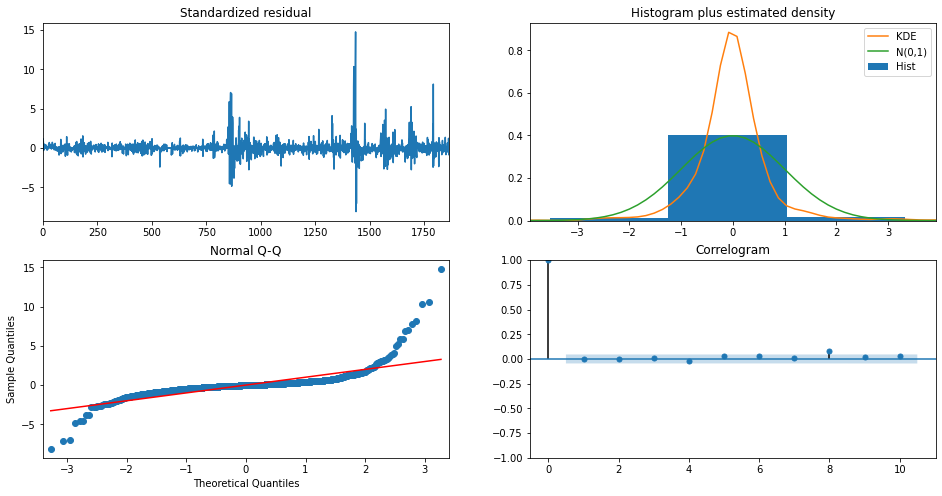

In [ ]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

* 잔차가 백색 잡음을 따르는지 보여주는 플랏은 Standardized residual과 Correlogram

> Standardized residual은 잔차를 그냥 시계열로 그린 것. 백색 잡음 답게 잔차의 시계열이 평균 0을 중심으로 무작위하게 움직인다.

> Correlogram은 잔차에 대한 ACF이다. ACF도 어느 정도 허용 범위 안에 위치하여 자기상관이 없음을 알 수 있다

* 잔차가 정규성을 만족하는지 보여주는 플랏은 Histogram plus estimated density와 Normal Q-Q

> Histogram plus estimated density는 잔차의 히스토그램을 그려 표준정규 분포와 밀도를 추정한 그래프를 같이 겹쳐서 보여준다. 표준정규분포와 비슷하게 대칭적이지만, 첨도가 더 뾰족하게 솟아오른 것을 알 수 있다.

> Normal Q-Q그래프는 Q-Q 플랏으로 정규성을 만족한다면 빨간 일직선 위에 점들이 분포해야한다. 그러나, 양 끝 쪽에서 빨간 선을 약간 벗어나는 듯한 모습을 보인다.

결과로 적합한 ARIMA (~)으로 남은 잔차는 백색 잡음이지만, 정규성은 따르지 않는다 볼 수 있다. -> 바꿔야 하나? 하지만 티나게 정규분포를 벗어나지 않는 것으로 보아 일단 넘어가고 예측에 실패하면 다시 모형 설정을 바꿔서 테스트할수도..

###2-4.주가 예측

데이터에 특정한 주기나 추세가 없기 때문에 어제의 값이 오늘의 값을 가장 잘 설명한다는 모형이 데이터를 가장 잘 설명
= 결과적으로, 데이터에서 어떠한 구조를 보기 어렵기 때문에, 가장 마지막 관측치가 가장 좋은 예측치다라 말하고 있는 것

따라서 한번에 테스트 데이터를 예측하는 것이 아니라, 한 스텝씩 예측하고, 테스트 데이터를 **"관측"** 할 때마다 모형을 업데이트해주는 전략

In [ ]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

forecasts = []
y1_pred = []
pred_upper = []
pred_lower = []

for new_ob in y1_test:
    fc, conf = forecast_one_step()
    y1_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])
    # 모형 업데이트
    model.update(new_ob)

pd.DataFrame({"y1_test": y1_test, "pred": y1_pred})

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,y1_test,pred
Date,,
2019-08-02,16250,16351.099741
2019-08-05,16250,16384.025411
2019-08-06,16100,16326.221831
2019-08-07,16250,16053.261239
2019-08-08,16350,16275.120843
...,...,...
2022-10-25,26400,26496.196325
2022-10-26,25000,26385.806434
2022-10-27,25200,25056.080370


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y1_train.index, y = y1_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y1_test.index, y = y1_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y1_test.index, y = y1_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))

    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y1_test.index.tolist() + y1_test.index[::-1].tolist()
                ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA 모형")
fig.show()

###2-5.모형 평가

평가를 하기 위해 MAPE(Mean Absolute Percentage Error) 지표를 활용

F를 예측값, A를 실제 테스트 데이터 값이라 할 때, MAPE는 "잔차 (F − A)의 크기가 실제 값 A의 크기에서 차지하는 백분율"로, 작을수록 좋다.

In [ ]:
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAPE: {MAPE(y1_test, y1_pred):.3f}")

MAPE: 2.342


잔차가 실제값의 3.061%

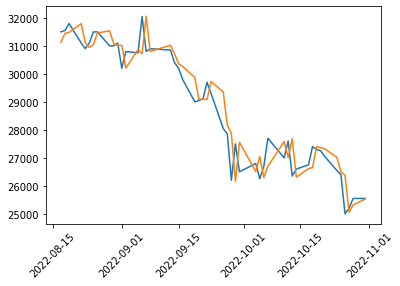

In [ ]:
y1_pred=pd.DataFrame(y1_pred,columns=['Close'],index=y1_test.index)   #y_pred를 데이터프레임 형태로 변환
plt.xticks(rotation=45)
plt.plot(y1_test[750:])
plt.plot(y1_pred[750:])

###2-6.예측데이터 만들기

test데이터셋에 Close(y_test)대신 y_pred넣기

In [ ]:
test1=df1[int(0.7*len(df1)):].drop('Close',axis=1)
test1=pd.concat([test1,y1_pred],axis=1)
test1

,Open,High,Low,Volume,Change,Close
Date,,,,,,
2019-08-02,16500,16500,16100,1615,-0.015152,16351.099741
2019-08-05,16500,16500,15850,2209,0.000000,16384.025411
2019-08-06,16200,16500,15300,5159,-0.009231,16326.221831
2019-08-07,16050,16400,15550,2552,0.009317,16053.261239
2019-08-08,16250,17350,16100,9860,0.006154,16275.120843
...,...,...,...,...,...,...
2022-10-25,27850,27850,26400,2632,-0.005650,26496.196325
2022-10-26,26350,26350,25000,691,-0.053030,26385.806434
2022-10-27,25100,25850,25100,1118,0.008000,25056.080370


###2-7.매수매도 타이밍 표시
예측된 데이터(pred)의 매수매도 타이밍을 표시하고 싶었는데 Volume, Low, High가 다 필요해서 못했음 => train, test데이터셋을 만들때 Close뿐만 아니라 다른 데이터들도 써야하나...?

수정종가가 필요한데 종가로 어떻게 계산해야할지 아직 모르겠음..

#### 1) OBV를 통한 매입매도 시점 분석
OBV는 On Balalce Volume를 의미하며, 주식의 거래량은 항상 주가에 선행한다는 것을 전제로 **거래량**을 통해 분석하는 기법

OBV계산 방법

1) IF 오늘 주식 종가 > 어제 주식 종가, 이전까지의 거래량 합산에 오늘 거래량을 합함

2) IF 오늘 주식 종가 < 어제 주식 종가, 이전까지의 거래량 합산에 오늘 거래량을 뺌

* 주가에 별다른 변화가 없거나 떨어졌는데 OBV가 상승했다면 이후 주가가 상승할 가능성이 있다고 볼 수 있다.

* 반대로 주가가 상승하는데 OBV가 하락하고 있다면 매도세력이 있으므로 주가는 하락할 가능성이 있다고 볼 수 있다.

"OBV를 구하고 OBV의 지수이동평균(EMA)를 구하여 OBV를 EMA가 넘는 순간이 주식을 **매입**할 시점, OBV가 EMA 아래로 내려가는 순간이 주식을 **매도**할 시점"

In [ ]:
plt.style.use('fivethirtyeight')

OBV=[]
OBV.append(0)
for i in range(1,len(test1)):
    if test1.Close[i]>test1.Close[i-1]:
        OBV.append(OBV[-1]+test1.Volume[i])
    elif test1.Close[i]<test1.Close[i-1]:
        OBV.append(OBV[-1]-test1.Volume[i])
    else:
        OBV.append(OBV[-1])

test1['OBV']=OBV
test1['OBV_EMA']=test1['OBV'].ewm(span=20).mean()   #20일 지수의 이동평균

In [ ]:
def buy_sell(signal, col1, col2):
    Buy=[]
    Sell=[]
    flag=-1
    for i in range(0,len(signal)):
        if signal[col1][i]<signal[col2][i] and flag!=1:
            Buy.append(signal['Close'][i])
            Sell.append(np.nan)
            flad=1
        elif signal[col1][i]<signal[col2][i] and flag!=0:
            Sell.append(signal['Close'][i])
            Buy.append(np.nan)
            flad=0
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
    return(Buy, Sell)

x=buy_sell(test1,'OBV','OBV_EMA')
test1['Buy']=x[0]
test1['Sell']=x[1]
test1

,Open,High,Low,Volume,Change,Close,OBV,OBV_EMA,Buy,Sell
Date,,,,,,,,,,
2019-08-02,16500,16500,16100,1615,-0.015152,16351.099741,0,0.000000e+00,NaN,NaN
2019-08-05,16500,16500,15850,2209,0.000000,16384.025411,2209,1.159725e+03,NaN,NaN
2019-08-06,16200,16500,15300,5159,-0.009231,16326.221831,-2950,-3.493414e+02,16326.221831,NaN
2019-08-07,16050,16400,15550,2552,0.009317,16053.261239,-5502,-1.836834e+03,16053.261239,NaN
2019-08-08,16250,17350,16100,9860,0.006154,16275.120843,4358,-3.383566e+02,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-10-25,27850,27850,26400,2632,-0.005650,26496.196325,2402331,2.406762e+06,26496.196325,NaN
2022-10-26,26350,26350,25000,691,-0.053030,26385.806434,2401640,2.406274e+06,26385.806434,NaN
2022-10-27,25100,25850,25100,1118,0.008000,25056.080370,2400522,2.405726e+06,25056.080370,NaN


In [ ]:
plt.figure(figsize=(12.2,4.5))
plt.plot(test1['Close'],label='Close',alpha=0.35)
plt.scatter(test1.index,test1['Buy'],label='Buy',marker='^',alpha=1,color='green')
plt.scatter(test1.index,test1['Sell'],label='Sell',marker='v',alpha=1,color='red')
plt.title('Buy & Sell signals by OBV')
plt.legend
plt.grid(True)
plt.show()

ConversionError: ignored

<Figure size 878.4x324 with 1 Axes>

In [ ]:
test1['Sell'].unique()

array([nan])

Sell이 모두 nan으로 나와서 OBV는 적합하지 않아보인다.

#### 2) MFI를 통한 주식 매수/매도 시점 분석
MFI는 주식의 가격과 거래량을 사용하여 주식이 과잉매도인지 과잉매수인지를 식별하는 지표로 사용된다.

MFI계산방법

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#(1)평균가격 구하기
mean_price=(test1['Close']+test1['High']+test1['Low'])

#(2) MoneyFlow 구하기
money_flow=mean_price*test1['Volume']

#(3)
positive_flow=[]
negative_flow=[]
for i in range(1,len(test1)):
    if mean_price[i]>mean_price[i-1]:
        positive_flow.append(money_flow[i-1])
        negative_flow.append(0)
    elif mean_price[i]<mean_price[i-1]:
        negative_flow.append(money_flow[i-1])
        positive_flow.append(0)
    else:
        positive_flow.append(0)
        negative_flow.append(0)

#(4)
period=14
positive_mf=[]
negative_mf=[]
for i in range(period-1,len(positive_flow)):
    positive_mf.append(sum(positive_flow[i+1-period:i+1]))
for i in range(period-1,len(negative_flow)):
    negative_mf.append(sum(negative_flow[i+1-period:i+1]))

#(5)
mfi=100*(np.array(positive_mf)/(np.array(positive_mf)+np.array(negative_mf)))

In [ ]:
new_df1=pd.DataFrame()
new_df1=test1[period:]
new_df1['MFI']=mfi

def get_signal(data,high,low):
    buy=[]
    sell=[]
    for i in range(len(data['MFI'])):
        if data['MFI'][i]>high:
            buy.append(np.nan)
            sell.append(data['Close'][i])
        elif data['MFI'][i]<low:
            buy.append(data['Close'][i])
            sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return(buy,sell)

new_df1['buy']=get_signal(new_df1,80,20)[0]
new_df1['sell']=get_signal(new_df1,80,20)[1]

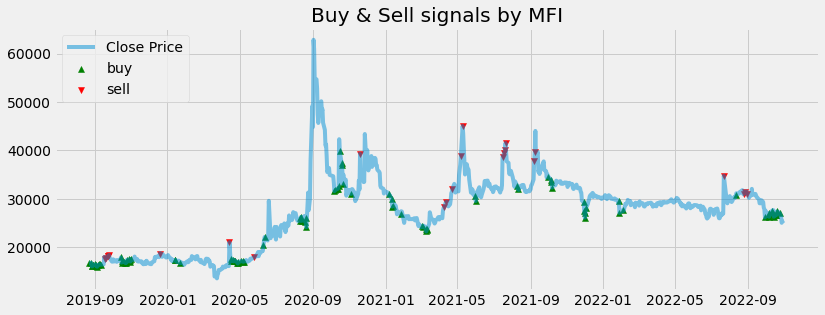

In [ ]:
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df1['Close'],label='Close Price',alpha=0.5)
plt.scatter(new_df1.index,new_df1['buy'],label='buy',marker='^',alpha=1,color='green')
plt.scatter(new_df1.index,new_df1['sell'],label='sell',marker='v',alpha=1,color='red')
plt.title('Buy & Sell signals by MFI')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
new_df1[new_df1['buy'].notnull()].index

DatetimeIndex(['2019-08-23', '2019-08-26', '2019-08-27', '2019-08-28',
               '2019-08-29', '2019-08-30', '2019-09-02', '2019-09-03',
               '2019-09-04', '2019-09-05',
               ...
               '2022-10-06', '2022-10-07', '2022-10-11', '2022-10-12',
               '2022-10-14', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-24'],
              dtype='datetime64[ns]', name='Date', length=105, freq=None)

In [ ]:
new_df1[new_df1['sell'].notnull()].index

DatetimeIndex(['2019-09-19', '2019-09-20', '2019-09-23', '2019-09-24',
               '2019-09-25', '2019-12-19', '2020-04-14', '2020-05-26',
               '2020-11-19', '2021-04-09', '2021-04-12', '2021-04-23',
               '2021-05-07', '2021-05-10', '2021-07-16', '2021-07-19',
               '2021-07-20', '2021-07-21', '2021-09-07', '2021-09-08',
               '2022-07-22', '2022-08-25', '2022-08-26', '2022-08-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

##3.df2(변동률 2위)

###3-1.시계열 자료 시각화

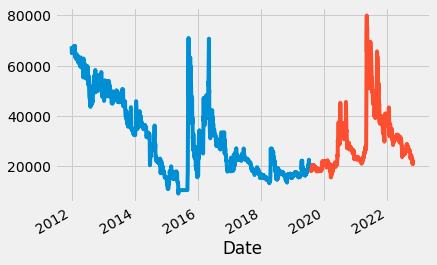

In [ ]:
#df2 종가 시각화 7:3으로 train, test분할
y2_train = df2['Close'][:int(0.7*len(df2))]
y2_test = df2['Close'][int(0.7*len(df2)):]
y2_train.plot()
y2_test.plot()

In [ ]:
#몇차 차분이 최선인지 파악하기 위해 ndiffs 함수 사용
kpss_diffs = ndiffs(y2_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y2_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 1


###3-2.ARIMA 모형 적합 (최적모형 탐색)

In [ ]:
#필수 옵션만 적용
model = pm.auto_arima (y2_train, d = 1, seasonal = False, trace = True)
model.fit(y2_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=32980.918, Time=1.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32976.593, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=32977.771, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=32977.792, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32975.055, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=32979.799, Time=0.31 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.113 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

###3-3.잔차 검정

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1866
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -16486.528
Date:                Sun, 04 Dec 2022   AIC                          32975.055
Time:                        08:52:16   BIC                          32980.586
Sample:                             0   HQIC                         32977.093
                               - 1866                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       2.79e+06   2.41e+04    115.975      0.000    2.74e+06    2.84e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):             56297.17
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                             0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

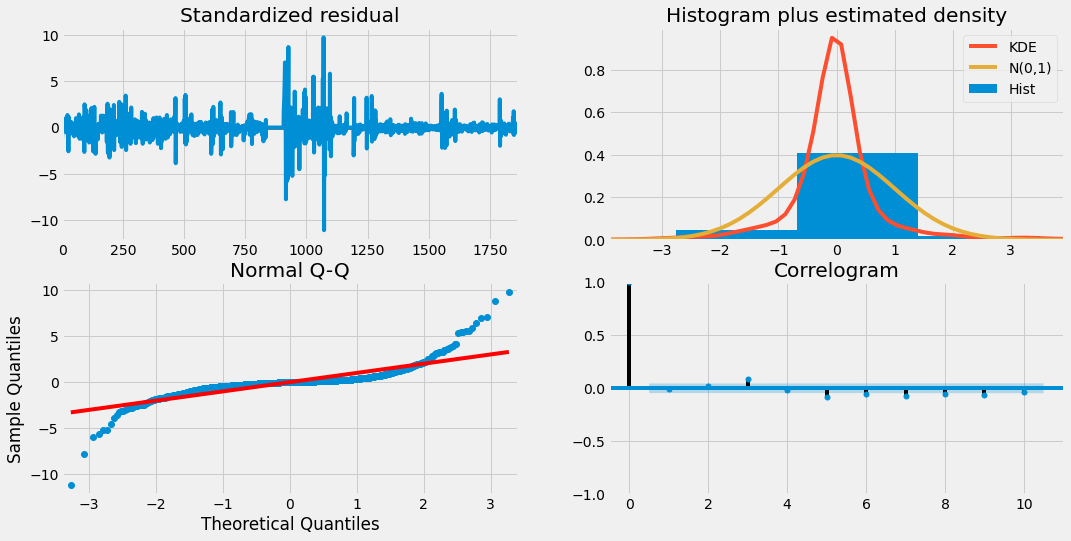

In [ ]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

###3-4.주가 예측

In [ ]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

forecasts = []
y2_pred = []
pred_upper = []
pred_lower = []

for new_ob in y2_test:
    fc, conf = forecast_one_step()
    y2_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])
    # 모형 업데이트
    model.update(new_ob)

pd.DataFrame({"y2_test": y2_test, "pred": y2_pred})

,y2_test,pred
Date,,
2019-08-02,18550,980.628857
2019-08-05,18200,18762.533548
2019-08-06,18300,18225.727800
2019-08-07,18450,18002.033185
2019-08-08,18350,18935.403929
...,...,...
2022-10-25,21400,22118.298892
2022-10-26,21100,21560.819326
2022-10-27,21600,21213.293101


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y2_train.index, y = y2_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y2_test.index, y = y2_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y2_test.index, y = y2_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))

    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y2_test.index.tolist() + y2_test.index[::-1].tolist()
                ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA 모형")
fig.show()

###3-5.모형 평가

In [ ]:
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAPE: {MAPE(y2_test, y2_pred):.3f}")

MAPE: 2.766


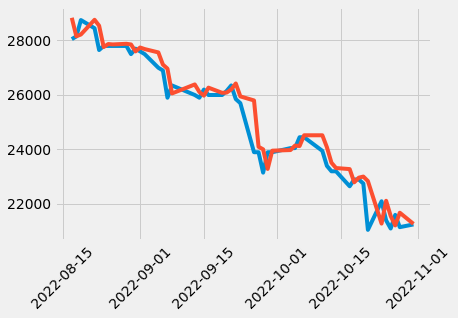

In [ ]:
y2_pred=pd.DataFrame(y2_pred,columns=['Close'],index=y2_test.index)   #y_pred를 데이터프레임 형태로 변환
plt.xticks(rotation=45)
plt.plot(y2_test[750:])
plt.plot(y2_pred[750:])

###3-6.예측데이터 만들기

In [ ]:
test2=df2[int(0.7*len(df2)):].drop('Close',axis=1)
test2=pd.concat([test2,y2_pred],axis=1)
test2

,Open,High,Low,Volume,Change,Close
Date,,,,,,
2019-08-02,18600,18750,18000,342,-0.002688,980.628857
2019-08-05,18050,19000,18050,776,-0.018868,18762.533548
2019-08-06,18100,19000,17950,2189,0.005495,18225.727800
2019-08-07,18300,19100,18300,1107,0.008197,18002.033185
2019-08-08,18450,19250,18000,2407,-0.005420,18935.403929
...,...,...,...,...,...,...
2022-10-25,21400,21550,21200,4199,-0.031674,22118.298892
2022-10-26,21550,21750,21100,1564,-0.014019,21560.819326
2022-10-27,21250,21600,21150,819,0.023697,21213.293101


###3-7.매수매도 타이밍 표시

####2) MFI를 통한 주식 매수/매도 시점 분석

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#(1)평균가격 구하기
mean_price=(test2['Close']+test2['High']+test2['Low'])

#(2) MoneyFlow 구하기
money_flow=mean_price*test2['Volume']

#(3)
positive_flow=[]
negative_flow=[]
for i in range(1,len(test2)):
    if mean_price[i]>mean_price[i-1]:
        positive_flow.append(money_flow[i-1])
        negative_flow.append(0)
    elif mean_price[i]<mean_price[i-1]:
        negative_flow.append(money_flow[i-1])
        positive_flow.append(0)
    else:
        positive_flow.append(0)
        negative_flow.append(0)

#(4)
period=14
positive_mf=[]
negative_mf=[]
for i in range(period-1,len(positive_flow)):
    positive_mf.append(sum(positive_flow[i+1-period:i+1]))
for i in range(period-1,len(negative_flow)):
    negative_mf.append(sum(negative_flow[i+1-period:i+1]))

#(5)
mfi=100*(np.array(positive_mf)/(np.array(positive_mf)+np.array(negative_mf)))

In [ ]:
new_df2=pd.DataFrame()
new_df2=test2[period:]
new_df2['MFI']=mfi

def get_signal(data,high,low):
    buy=[]
    sell=[]
    for i in range(len(data['MFI'])):
        if data['MFI'][i]>high:
            buy.append(np.nan)
            sell.append(data['Close'][i])
        elif data['MFI'][i]<low:
            buy.append(data['Close'][i])
            sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return(buy,sell)

new_df2['buy']=get_signal(new_df2,80,20)[0]
new_df2['sell']=get_signal(new_df2,80,20)[1]

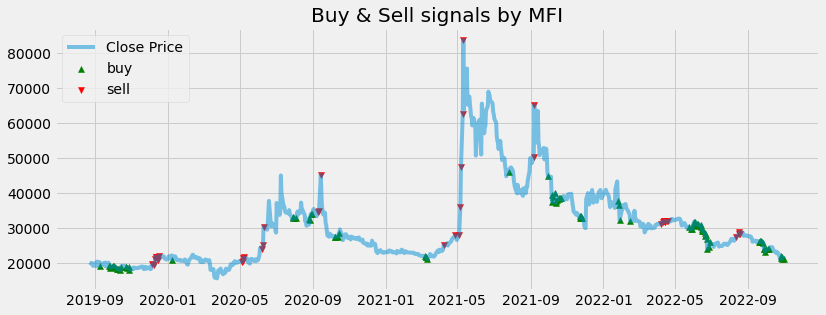

In [ ]:
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df2['Close'],label='Close Price',alpha=0.5)
plt.scatter(new_df2.index,new_df2['buy'],label='buy',marker='^',alpha=1,color='green')
plt.scatter(new_df2.index,new_df2['sell'],label='sell',marker='v',alpha=1,color='red')
plt.title('Buy & Sell signals by MFI')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
new_df2[new_df2['buy'].notnull()].index

DatetimeIndex(['2019-09-10', '2019-09-25', '2019-09-26', '2019-09-27',
               '2019-09-30', '2019-10-01', '2019-10-04', '2019-10-07',
               '2019-10-08', '2019-10-10', '2019-10-11', '2019-10-14',
               '2019-10-15', '2019-10-23', '2019-10-24', '2019-10-25',
               '2019-10-28', '2019-10-29', '2020-01-09', '2020-07-29',
               '2020-07-30', '2020-07-31', '2020-08-03', '2020-08-26',
               '2020-08-27', '2020-08-28', '2020-08-31', '2020-10-07',
               '2020-10-08', '2020-10-12', '2020-10-14', '2021-03-08',
               '2021-03-09', '2021-03-10', '2021-03-11', '2021-07-26',
               '2021-09-30', '2021-10-06', '2021-10-07', '2021-10-08',
               '2021-10-12', '2021-10-13', '2021-10-14', '2021-10-15',
               '2021-10-18', '2021-10-19', '2021-10-20', '2021-10-21',
               '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
               '2021-11-26', '2022-01-26', '2022-01-27', '2022-01-28',
      

In [ ]:
new_df2[new_df2['sell'].notnull()].index

DatetimeIndex(['2019-12-06', '2019-12-10', '2019-12-11', '2019-12-12',
               '2019-12-13', '2019-12-16', '2019-12-17', '2020-05-04',
               '2020-05-06', '2020-05-07', '2020-05-08', '2020-06-08',
               '2020-06-09', '2020-06-10', '2020-09-10', '2020-09-11',
               '2020-09-14', '2021-04-08', '2021-04-27', '2021-05-04',
               '2021-05-06', '2021-05-07', '2021-05-10', '2021-05-11',
               '2021-09-06', '2021-09-07', '2022-04-08', '2022-04-11',
               '2022-04-12', '2022-04-13', '2022-04-14', '2022-04-15',
               '2022-04-18', '2022-04-20', '2022-08-12', '2022-08-16',
               '2022-08-17', '2022-08-18'],
              dtype='datetime64[ns]', name='Date', freq=None)

##4.df3(변동률 3위)

###4-1.시계열 자료 시각화

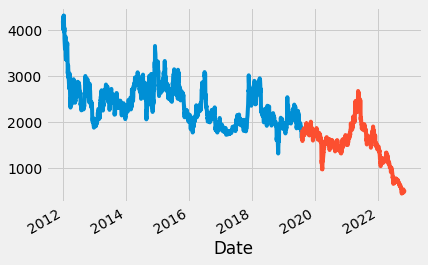

In [ ]:
#df3 종가 시각화 7:3으로 train, test분할
y3_train = df3['Close'][:int(0.7*len(df3))]
y3_test = df3['Close'][int(0.7*len(df3)):]
y3_train.plot()
y3_test.plot()

In [ ]:
#몇차 차분이 최선인지 파악하기 위해 ndiffs 함수 사용
kpss_diffs = ndiffs(y3_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y3_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 1


###4-2.ARIMA 모형 적합 (최적모형 탐색)

In [ ]:
#필수 옵션만 적용
model = pm.auto_arima (y3_train, d = 1, seasonal = False, trace = True)
model.fit(y3_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21428.727, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21429.964, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21429.925, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21427.263, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21423.310, Time=1.92 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=21430.656, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=21430.786, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=21422.503, Time=0.55 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=21428.484, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=21428.521, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=21424.503, Time=1.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             :

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

###4-3.잔차 검정

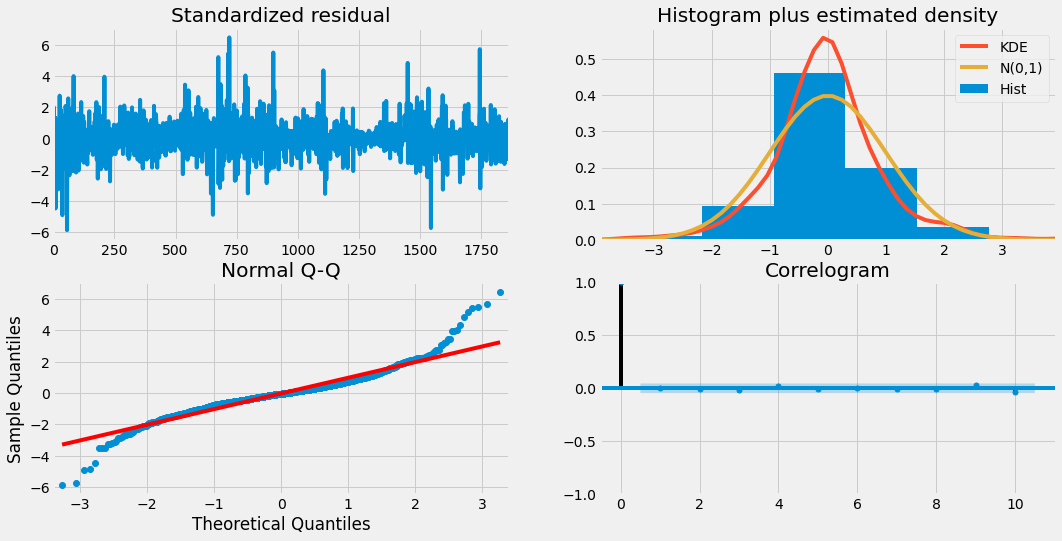

In [ ]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

###4-4.주가 예측

In [ ]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

forecasts = []
y3_pred = []
pred_upper = []
pred_lower = []

for new_ob in y3_test:
    fc, conf = forecast_one_step()
    y3_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])
    # 모형 업데이트
    model.update(new_ob)

pd.DataFrame({"y3_test": y3_test, "pred": y3_pred})

,y3_test,pred
Date,,
2019-08-02,1830,21357.122115
2019-08-05,1635,3335.975447
2019-08-06,1585,1888.558466
2019-08-07,1650,1786.848991
2019-08-08,1745,1876.568312
...,...,...
2022-10-25,498,493.180337
2022-10-26,483,511.639035
2022-10-27,509,474.980924


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y3_train.index, y = y3_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y3_test.index, y = y3_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y3_test.index, y = y3_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))

    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y3_test.index.tolist() + y3_test.index[::-1].tolist()
                ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA 모형")
fig.show()

###4-5.모형 평가

In [ ]:
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAPE: {MAPE(y3_test, y3_pred):.3f}")

MAPE: 4.666


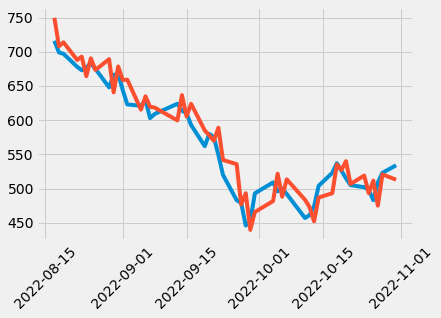

In [ ]:
y3_pred=pd.DataFrame(y3_pred,columns=['Close'],index=y3_test.index)   #y_pred를 데이터프레임 형태로 변환
plt.xticks(rotation=45)
plt.plot(y3_test[750:])
plt.plot(y3_pred[750:])

###4-6.예측데이터 만들기

In [ ]:
test3=df3[int(0.7*len(df3)):].drop('Close',axis=1)
test3=pd.concat([test3,y3_pred],axis=1)
test3

,Open,High,Low,Volume,Change,Close
Date,,,,,,
2019-08-02,1780,1850,1775,863107,0.016667,21357.122115
2019-08-05,1810,1825,1630,1443919,-0.106557,3335.975447
2019-08-06,1550,1670,1515,2307595,-0.030581,1888.558466
2019-08-07,1565,1655,1565,1496055,0.041009,1786.848991
2019-08-08,1660,1760,1660,1032442,0.057576,1876.568312
...,...,...,...,...,...,...
2022-10-25,505,518,496,227747,-0.007968,493.180337
2022-10-26,499,499,481,283786,-0.030120,511.639035
2022-10-27,490,512,488,259049,0.053830,474.980924


###4-7.매수매도 타이밍 표시

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#(1)평균가격 구하기
mean_price=(test3['Close']+test3['High']+test3['Low'])

#(2) MoneyFlow 구하기
money_flow=mean_price*test3['Volume']

#(3)
positive_flow=[]
negative_flow=[]
for i in range(1,len(test3)):
    if mean_price[i]>mean_price[i-1]:
        positive_flow.append(money_flow[i-1])
        negative_flow.append(0)
    elif mean_price[i]<mean_price[i-1]:
        negative_flow.append(money_flow[i-1])
        positive_flow.append(0)
    else:
        positive_flow.append(0)
        negative_flow.append(0)

#(4)
period=14
positive_mf=[]
negative_mf=[]
for i in range(period-1,len(positive_flow)):
    positive_mf.append(sum(positive_flow[i+1-period:i+1]))
for i in range(period-1,len(negative_flow)):
    negative_mf.append(sum(negative_flow[i+1-period:i+1]))

#(5)
mfi=100*(np.array(positive_mf)/(np.array(positive_mf)+np.array(negative_mf)))

In [ ]:
new_df3=pd.DataFrame()
new_df3=test3[period:]
new_df3['MFI']=mfi

def get_signal(data,high,low):
    buy=[]
    sell=[]
    for i in range(len(data['MFI'])):
        if data['MFI'][i]>high:
            buy.append(np.nan)
            sell.append(data['Close'][i])
        elif data['MFI'][i]<low:
            buy.append(data['Close'][i])
            sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return(buy,sell)

new_df3['buy']=get_signal(new_df3,80,20)[0]
new_df3['sell']=get_signal(new_df3,80,20)[1]

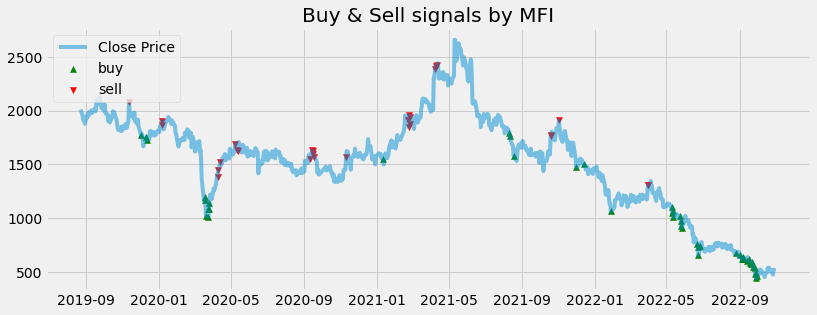

In [ ]:
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df3['Close'],label='Close Price',alpha=0.5)
plt.scatter(new_df3.index,new_df3['buy'],label='buy',marker='^',alpha=1,color='green')
plt.scatter(new_df3.index,new_df3['sell'],label='sell',marker='v',alpha=1,color='red')
plt.title('Buy & Sell signals by MFI')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
new_df3[new_df3['buy'].notnull()].index

DatetimeIndex(['2019-12-02', '2019-12-11', '2019-12-12', '2020-03-18',
               '2020-03-19', '2020-03-20', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2021-01-11', '2021-08-11',
               '2021-08-12', '2021-08-18', '2021-12-01', '2021-12-14',
               '2022-01-28', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-24', '2022-05-25', '2022-05-26',
               '2022-05-27', '2022-06-22', '2022-06-23', '2022-06-24',
               '2022-06-27', '2022-08-26', '2022-09-02', '2022-09-05',
               '2022-09-06', '2022-09-07', '2022-09-08', '2022-09-13',
               '2022-09-16', '2022-09-19', '2022-09-20', '2022-09-22',
               '2022-09-23', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
new_df3[new_df3['sell'].notnull()].index

DatetimeIndex(['2019-11-12', '2020-01-06', '2020-01-07', '2020-04-09',
               '2020-04-10', '2020-04-13', '2020-05-08', '2020-05-11',
               '2020-05-12', '2020-09-11', '2020-09-14', '2020-09-15',
               '2020-09-16', '2020-09-17', '2020-11-10', '2021-02-22',
               '2021-02-23', '2021-02-24', '2021-02-25', '2021-02-26',
               '2021-04-08', '2021-04-09', '2021-04-12', '2021-10-19',
               '2021-10-20', '2021-11-02', '2022-03-31', '2022-04-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

##5.df4(변동률 4위)

###5-1.시계열 자료 시각화

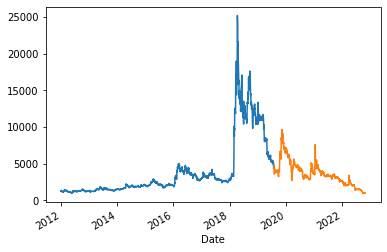

In [ ]:
#df4 종가 시각화 7:3으로 train, test분할
y4_train = df4['Close'][:int(0.7*len(df4))]
y4_test = df4['Close'][int(0.7*len(df4)):]
y4_train.plot()
y4_test.plot()

In [ ]:
#몇차 차분이 최선인지 파악하기 위해 ndiffs 함수 사용
kpss_diffs = ndiffs(y4_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y4_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 1


###5-2.ARIMA 모형 적합 (최적모형 탐색)

In [ ]:
#필수 옵션만 적용
model = pm.auto_arima (y4_train, d = 1, seasonal = False, trace = True)
model.fit(y4_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=27312.864, Time=2.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27384.121, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27377.822, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27378.401, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27382.168, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=27356.615, Time=1.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=27356.435, Time=1.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=27307.073, Time=3.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=27381.186, Time=0.24 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=27359.198, Time=3.11 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=27349.113, Time=3.34 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.26 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=27347.856, Time=2.30 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=27350.990, Time=4.03 sec
 ARIMA(3,1,2)(0,0,0)[0]  

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True)

###5-3.잔차 검정

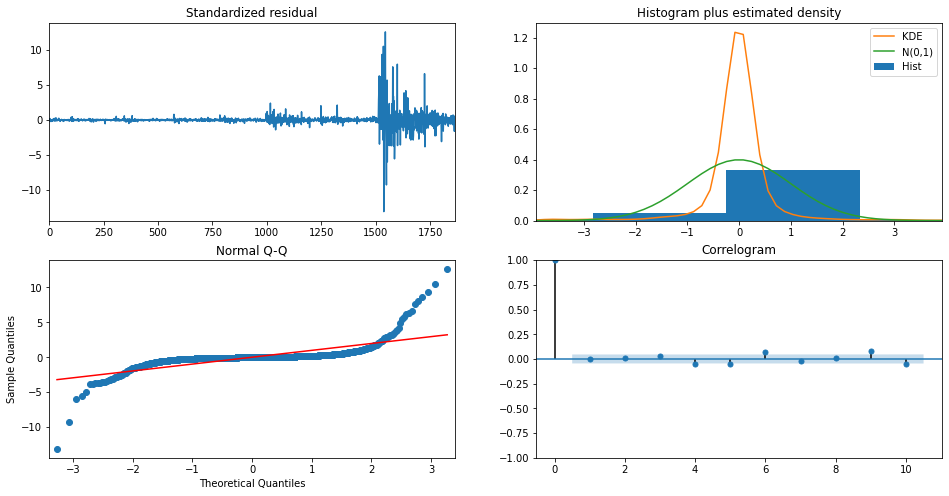

In [ ]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

###5-4.주가 예측

In [ ]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

forecasts = []
y4_pred = []
pred_upper = []
pred_lower = []

for new_ob in y4_test:
    fc, conf = forecast_one_step()
    y4_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])
    # 모형 업데이트
    model.update(new_ob)

pd.DataFrame({"y4_test": y4_test, "pred": y4_pred})

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,y4_test,pred
Date,,
2019-08-02,4887,4703.668124
2019-08-05,3899,4938.256854
2019-08-06,3552,3865.398691
2019-08-07,3603,3619.600890
2019-08-08,3922,3574.686072
...,...,...
2022-10-25,995,967.252169
2022-10-26,987,1011.676913
2022-10-27,1000,971.806902


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y4_train.index, y = y4_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y4_test.index, y = y4_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y4_test.index, y = y4_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))

    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y4_test.index.tolist() + y4_test.index[::-1].tolist()
                ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA 모형")
fig.show()

###5-5.모형 평가

In [ ]:
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAPE: {MAPE(y4_test, y4_pred):.3f}")

MAPE: 3.069


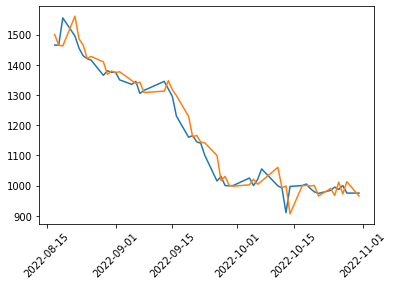

In [ ]:
y4_pred=pd.DataFrame(y4_pred,columns=['Close'],index=y4_test.index)   #y_pred를 데이터프레임 형태로 변환
plt.xticks(rotation=45)
plt.plot(y4_test[750:])
plt.plot(y4_pred[750:])

###5-6.예측데이터 만들기

In [ ]:
test4=df4[int(0.7*len(df4)):].drop('Close',axis=1)
test4=pd.concat([test4,y4_pred],axis=1)
test4

,Open,High,Low,Volume,Change,Close
Date,,,,,,
2019-08-02,4622,5469,4575,5220464,0.027328,4703.668124
2019-08-05,4857,4866,3866,5857551,-0.202169,4938.256854
2019-08-06,3728,3871,3357,6777462,-0.088997,3865.398691
2019-08-07,3556,3774,3552,3248271,0.014358,3619.600890
2019-08-08,3648,4036,3629,6779140,0.088537,3574.686072
...,...,...,...,...,...,...
2022-10-25,985,1005,975,335431,0.011179,967.252169
2022-10-26,998,1005,976,310869,-0.008040,1011.676913
2022-10-27,977,1025,977,584534,0.013171,971.806902


###5-7.매수매도 타이밍 표시

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#(1)평균가격 구하기
mean_price=(test4['Close']+test4['High']+test4['Low'])/3

#(2) MoneyFlow 구하기
money_flow=mean_price*test4['Volume']

#(3)
positive_flow=[]
negative_flow=[]
for i in range(1,len(test4)):
    if mean_price[i]>mean_price[i-1]:
        positive_flow.append(money_flow[i-1])
        negative_flow.append(0)
    elif mean_price[i]<mean_price[i-1]:
        negative_flow.append(money_flow[i-1])
        positive_flow.append(0)
    else:
        positive_flow.append(0)
        negative_flow.append(0)

#(4)
period=14
positive_mf=[]
negative_mf=[]
for i in range(period-1,len(positive_flow)):
    positive_mf.append(sum(positive_flow[i+1-period:i+1]))
for i in range(period-1,len(negative_flow)):
    negative_mf.append(sum(negative_flow[i+1-period:i+1]))

#(5)
mfi=100*(np.array(positive_mf)/(np.array(positive_mf)+np.array(negative_mf)))

In [ ]:
new_df4=pd.DataFrame()
new_df4=test4[period:]
new_df4['MFI']=mfi

def get_signal(data,high,low):
    buy=[]
    sell=[]
    for i in range(len(data['MFI'])):
        if data['MFI'][i]>high:
            buy.append(np.nan)
            sell.append(data['Close'][i])
        elif data['MFI'][i]<low:
            buy.append(data['Close'][i])
            sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return(buy,sell)

new_df4['buy']=get_signal(new_df4,80,20)[0]
new_df4['sell']=get_signal(new_df4,80,20)[1]

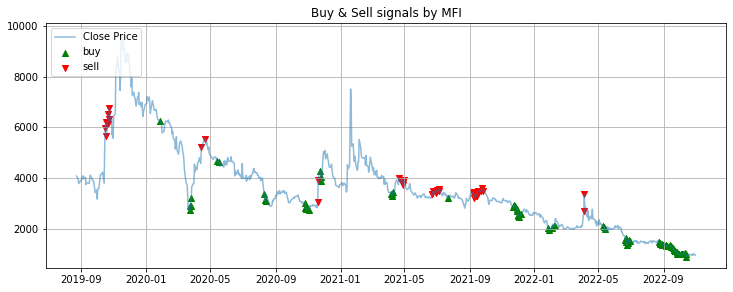

In [ ]:
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df4['Close'],label='Close Price',alpha=0.5)
plt.scatter(new_df4.index,new_df4['buy'],label='buy',marker='^',alpha=1,color='green')
plt.scatter(new_df4.index,new_df4['sell'],label='sell',marker='v',alpha=1,color='red')
plt.title('Buy & Sell signals by MFI')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
new_df4[new_df4['buy'].notnull()].index

DatetimeIndex(['2020-01-28', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-05-13', '2020-05-18', '2020-08-10',
               '2020-08-11', '2020-08-13', '2020-10-26', '2020-10-27',
               '2020-10-28', '2020-10-29', '2020-11-02', '2020-11-24',
               '2020-11-25', '2020-11-26', '2021-04-06', '2021-04-07',
               '2021-04-08', '2021-04-09', '2021-07-23', '2021-11-22',
               '2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-06', '2022-01-27', '2022-01-28',
               '2022-02-03', '2022-02-07', '2022-02-08', '2022-05-11',
               '2022-05-12', '2022-05-13', '2022-06-21', '2022-06-22',
               '2022-06-23', '2022-06-24', '2022-06-27', '2022-06-28',
               '2022-06-29', '2022-08-24', '2022-08-25', '2022-08-26',
               '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01',
      

In [ ]:
new_df4[new_df4['sell'].notnull()].index

DatetimeIndex(['2019-10-16', '2019-10-17', '2019-10-18', '2019-10-21',
               '2019-10-22', '2019-10-23', '2019-10-24', '2020-04-14',
               '2020-04-20', '2020-11-19', '2020-11-20', '2021-04-21',
               '2021-04-26', '2021-04-27', '2021-04-28', '2021-04-29',
               '2021-04-30', '2021-06-22', '2021-06-23', '2021-06-24',
               '2021-06-29', '2021-06-30', '2021-07-01', '2021-07-02',
               '2021-07-05', '2021-07-06', '2021-09-07', '2021-09-08',
               '2021-09-09', '2021-09-10', '2021-09-13', '2021-09-14',
               '2021-09-15', '2021-09-16', '2021-09-17', '2021-09-23',
               '2021-09-24', '2021-09-27', '2022-04-04', '2022-04-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

##6.df5(변동률 5위) - 사용X

###6-1.시계열 자료 시각화

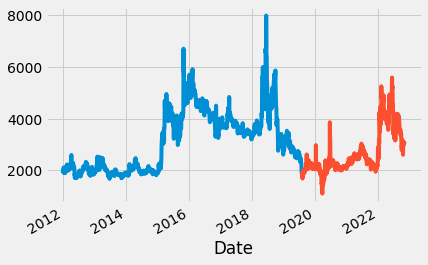

In [ ]:
#df5 종가 시각화 7:3으로 train, test분할
y5_train = df5['Close'][:int(0.7*len(df5))]
y5_test = df5['Close'][int(0.7*len(df5)):]
y5_train.plot()
y5_test.plot()

In [ ]:
#몇차 차분이 최선인지 파악하기 위해 ndiffs 함수 사용
kpss_diffs = ndiffs(y5_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y5_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 1


###6-2.ARIMA 모형 적합 (최적모형 탐색)

In [ ]:
#필수 옵션만 적용
model = pm.auto_arima (y5_train, d = 1, seasonal = False, trace = True)
model.fit(y5_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=23572.359, Time=1.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23582.362, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23580.483, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=23579.990, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=23580.362, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=23575.776, Time=1.76 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=23574.984, Time=1.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=23576.355, Time=1.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=23569.879, Time=5.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=23573.919, Time=1.10 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=23569.535, Time=5.14 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=23571.735, Time=5.73 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=5.55 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=23577.817, Time=1.61 sec
 ARIMA(4,1,2)(0,0,0)[0] i

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

###6-3.잔차 검정

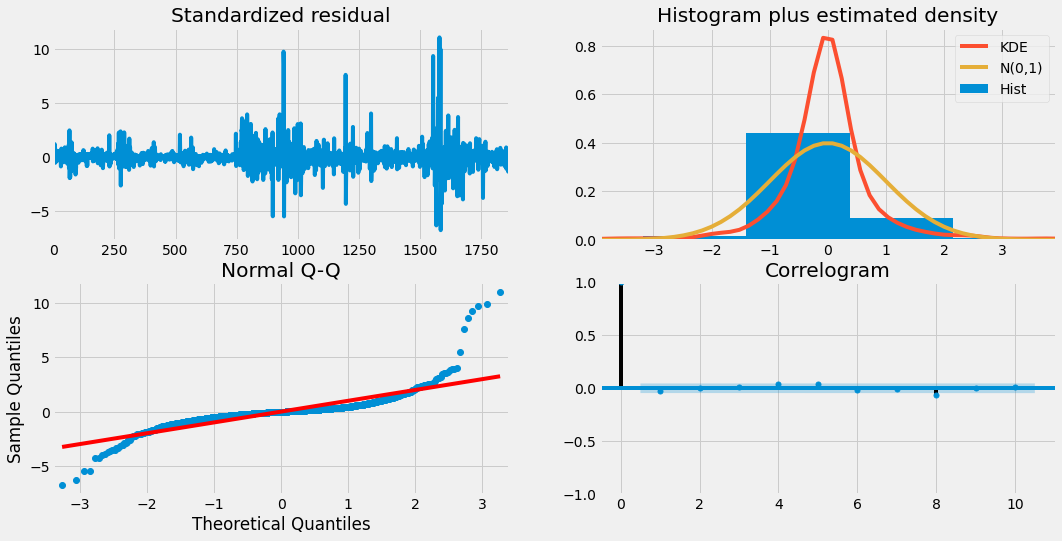

In [ ]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

###6-4.주가 예측

In [ ]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

forecasts = []
y5_pred = []
pred_upper = []
pred_lower = []

for new_ob in y5_test:
    fc, conf = forecast_one_step()
    y5_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])
    # 모형 업데이트
    model.update(new_ob)

pd.DataFrame({"y5_test": y5_test, "pred": y5_pred})

,y5_test,pred
Date,,
2019-08-02,1960,1987.186059
2019-08-05,1765,1968.981602
2019-08-06,1685,1773.496833
2019-08-07,1715,1716.212315
2019-08-08,1845,1720.728413
...,...,...
2022-10-25,3065,3063.218062
2022-10-26,3060,3068.183642
2022-10-27,3060,3076.587119


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y5_train.index, y = y5_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y5_test.index, y = y5_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y5_test.index, y = y5_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))

    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y5_test.index.tolist() + y5_test.index[::-1].tolist()
                ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA 모형")
fig.show()

###6-5.모형 평가

In [ ]:
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAPE: {MAPE(y5_test, y5_pred):.3f}")

MAPE: 2.549


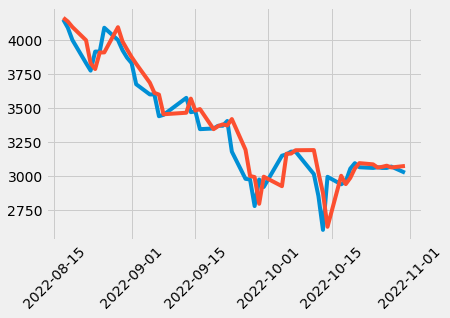

In [ ]:
y5_pred=pd.DataFrame(y5_pred,columns=['Close'],index=y5_test.index)   #y_pred를 데이터프레임 형태로 변환
plt.xticks(rotation=45)
plt.plot(y5_test[750:])
plt.plot(y5_pred[750:])

###6-6.예측데이터 만들기

In [ ]:
test5=df5[int(0.7*len(df5)):].drop('Close',axis=1)
test5=pd.concat([test5,y5_pred],axis=1)
test5

,Open,High,Low,Volume,Change,Close
Date,,,,,,
2019-08-02,1940,1980,1870,128999,-0.002545,1987.186059
2019-08-05,1925,1970,1750,318209,-0.099490,1968.981602
2019-08-06,1650,1800,1620,397191,-0.045326,1773.496833
2019-08-07,1650,1750,1650,256016,0.017804,1716.212315
2019-08-08,1740,1940,1740,450545,0.075802,1720.728413
...,...,...,...,...,...,...
2022-10-25,3060,3110,3010,961432,0.001634,3063.218062
2022-10-26,3170,3230,3040,1752213,-0.001631,3068.183642
2022-10-27,3035,3075,3030,404488,0.000000,3076.587119


###6-7.매수매도 타이밍 표시

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#(1)평균가격 구하기
mean_price=(test5['Close']+test5['High']+test5['Low'])

#(2) MoneyFlow 구하기
money_flow=mean_price*test5['Volume']

#(3)
positive_flow=[]
negative_flow=[]
for i in range(1,len(test5)):
    if mean_price[i]>mean_price[i-1]:
        positive_flow.append(money_flow[i-1])
        negative_flow.append(0)
    elif mean_price[i]<mean_price[i-1]:
        negative_flow.append(money_flow[i-1])
        positive_flow.append(0)
    else:
        positive_flow.append(0)
        negative_flow.append(0)

#(4)
period=14
positive_mf=[]
negative_mf=[]
for i in range(period-1,len(positive_flow)):
    positive_mf.append(sum(positive_flow[i+1-period:i+1]))
for i in range(period-1,len(negative_flow)):
    negative_mf.append(sum(negative_flow[i+1-period:i+1]))

#(5)
mfi=100*(np.array(positive_mf)/(np.array(positive_mf)+np.array(negative_mf)))

In [ ]:
new_df5=pd.DataFrame()
new_df5=test5[period:]
new_df5['MFI']=mfi

def get_signal(data,high,low):
    buy=[]
    sell=[]
    for i in range(len(data['MFI'])):
        if data['MFI'][i]>high:
            buy.append(np.nan)
            sell.append(data['Close'][i])
        elif data['MFI'][i]<low:
            buy.append(data['Close'][i])
            sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return(buy,sell)

new_df5['buy']=get_signal(new_df4,80,20)[0]
new_df5['sell']=get_signal(new_df4,80,20)[1]

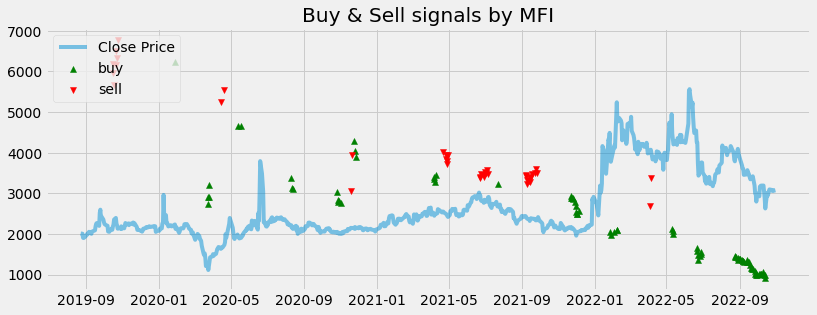

In [ ]:
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df5['Close'],label='Close Price',alpha=0.5)
plt.scatter(new_df5.index,new_df5['buy'],label='buy',marker='^',alpha=1,color='green')
plt.scatter(new_df5.index,new_df5['sell'],label='sell',marker='v',alpha=1,color='red')
plt.title('Buy & Sell signals by MFI')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
new_df5[new_df5['buy'].notnull()].index

DatetimeIndex(['2020-01-28', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-05-13', '2020-05-18', '2020-08-10',
               '2020-08-11', '2020-08-13', '2020-10-26', '2020-10-27',
               '2020-10-28', '2020-10-29', '2020-11-02', '2020-11-24',
               '2020-11-25', '2020-11-26', '2021-04-06', '2021-04-07',
               '2021-04-08', '2021-04-09', '2021-07-23', '2021-11-22',
               '2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-06', '2022-01-27', '2022-01-28',
               '2022-02-03', '2022-02-07', '2022-02-08', '2022-05-11',
               '2022-05-12', '2022-05-13', '2022-06-21', '2022-06-22',
               '2022-06-23', '2022-06-24', '2022-06-27', '2022-06-28',
               '2022-06-29', '2022-08-24', '2022-08-25', '2022-08-26',
               '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01',
      

In [ ]:
new_df5[new_df5['sell'].notnull()].index

DatetimeIndex(['2019-10-16', '2019-10-17', '2019-10-18', '2019-10-21',
               '2019-10-22', '2019-10-23', '2019-10-24', '2020-04-14',
               '2020-04-20', '2020-11-19', '2020-11-20', '2021-04-21',
               '2021-04-26', '2021-04-27', '2021-04-28', '2021-04-29',
               '2021-04-30', '2021-06-22', '2021-06-23', '2021-06-24',
               '2021-06-29', '2021-06-30', '2021-07-01', '2021-07-02',
               '2021-07-05', '2021-07-06', '2021-09-07', '2021-09-08',
               '2021-09-09', '2021-09-10', '2021-09-13', '2021-09-14',
               '2021-09-15', '2021-09-16', '2021-09-17', '2021-09-23',
               '2021-09-24', '2021-09-27', '2022-04-04', '2022-04-05'],
              dtype='datetime64[ns]', name='Date', freq=None)